In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [58]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [59]:
X=data.data
y=data.target

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=55)
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [61]:
L.fit(X_train,y_train)

LinearRegression()

In [62]:
print(L.coef_)
print(L.intercept_)

[   2.28127347 -243.06420894  539.12564618  336.86017989 -919.51002554
  558.8445515   128.65946841  157.91842174  766.05071959   92.81959226]
154.42165412814634


In [63]:
y_pred=L.predict(X_test)

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5336631921395185
RMSE 52.84984665544577


In [65]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.002)

In [66]:
R.fit(X_train,y_train)

Ridge(alpha=0.002)

In [67]:
print(R.coef_)
print(R.intercept_)

[   4.10985472 -239.85497248  540.99757458  335.01086581 -696.16546175
  378.57199503   32.88249322  136.89812571  678.04508827   95.38780731]
154.45432212877625


In [68]:
y_pred1=R.predict(X_test)

In [69]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5341601418253952
RMSE 52.821679550754794


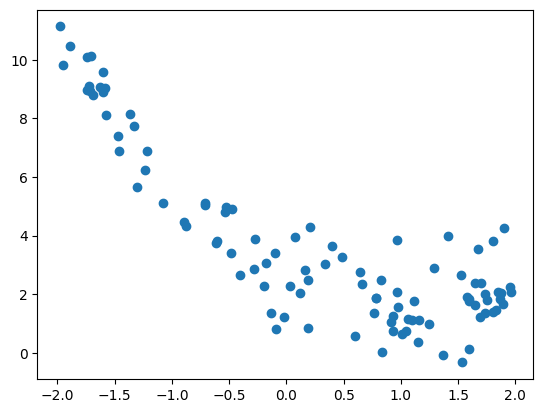

In [75]:
m = 100
x1 = 4 * np.random.rand(m, 1) - 2
x2 = 0.9 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

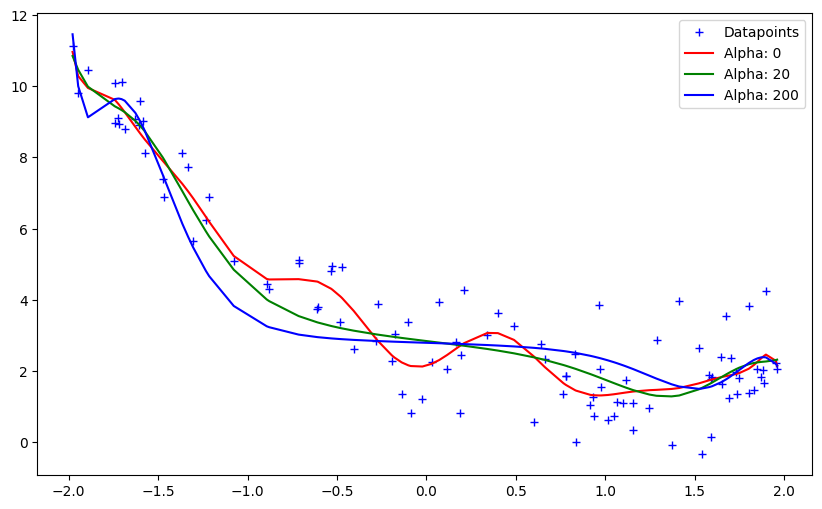

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()